In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def f(dim):
    '''
    target function.
    '''
    return np.random.randint(-10,10,dim)

def generate_dataset(num, dim, w):
    '''
    generate ground truth dataset D using ground truth w.
    D is contained of num points.
    '''
    x = np.random.randint(-10,10,(num,dim))
    y = np.sign(np.matmul(x,w.reshape(dim,1)))
    return x, y

In [3]:
def PLA(x, y):
    w = np.zeros(x.shape[1]).reshape(dim,1)
    misclassified_id = np.squeeze(np.sign(np.matmul(x,w)) != y)
    iters = 0
    
    while misclassified_id.any() :
        select_point = np.argmax(misclassified_id==True)
        w += (y[select_point] * x[select_point]).reshape(dim,1)
        misclassified_id = np.squeeze(np.sign(np.matmul(x,w)) != y)
        iters += 1
        
    return w, iters

In [4]:
dim = 2
w = f(dim)
x, y = generate_dataset(20, dim, w)

In [7]:
w, iters = PLA(x, y)
print("iters : ", iters)

iters :  24


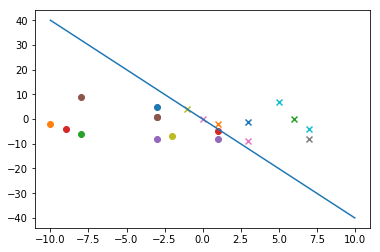

In [6]:
for i in range(x.shape[0]):
    if y[i]==1:
        plt.scatter(x[i,0],x[i,1],marker="o")
    else:
        plt.scatter(x[i,0],x[i,1],marker="x")

y1 = -1*w[0]/w[1] * (-10)
y2 = -1*w[0]/w[1] * (10)
plt.plot([-10, 10], [y1, y2]);